# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [4]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
  # Load the raw CIFAR-10 data
  cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  # Subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]

  return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print X_train.shape


(49000, 32, 32, 3)


## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [11]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [26]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-6, 1e-4, 1e-3,1e-5]
# regularization_strengths = [1e5, 1e6, 1e4]
regularization_strengths=[0,0.5,5]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
for i in learning_rates:
    for j in regularization_strengths:
        svm = LinearSVM()
        loss_hist = svm.train(X_train_feats, y_train, learning_rate=i, reg=j,
                      num_iters=2000, verbose=True)
        y_val_pred = svm.predict(X_val_feats)
        y_train_pred=svm.predict(X_train_feats)
        train_acc = np.mean(y_train==y_train_pred)
        val_acc=np.mean(y_val_pred==y_val)
        results[(i,j)]=(train_acc,val_acc)
        if val_acc>best_val:
            best_svm=svm
            best_val=val_acc
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

iteration 0 / 2000: loss 9.004186
iteration 100 / 2000: loss 9.004983
iteration 200 / 2000: loss 8.983206
iteration 300 / 2000: loss 8.962799
iteration 400 / 2000: loss 8.977606
iteration 500 / 2000: loss 8.967665
iteration 600 / 2000: loss 8.964154
iteration 700 / 2000: loss 8.952597
iteration 800 / 2000: loss 8.937664
iteration 900 / 2000: loss 8.921261
iteration 1000 / 2000: loss 8.939448
iteration 1100 / 2000: loss 8.925385
iteration 1200 / 2000: loss 8.935577
iteration 1300 / 2000: loss 8.900849
iteration 1400 / 2000: loss 8.909703
iteration 1500 / 2000: loss 8.897514
iteration 1600 / 2000: loss 8.874660
iteration 1700 / 2000: loss 8.883682
iteration 1800 / 2000: loss 8.885192
iteration 1900 / 2000: loss 8.868004
iteration 0 / 2000: loss 9.010737
iteration 100 / 2000: loss 8.995869
iteration 200 / 2000: loss 8.970057
iteration 300 / 2000: loss 8.981518
iteration 400 / 2000: loss 8.983497
iteration 500 / 2000: loss 8.967181
iteration 600 / 2000: loss 8.963891
iteration 700 / 2000: 

In [29]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print test_accuracy

0.493


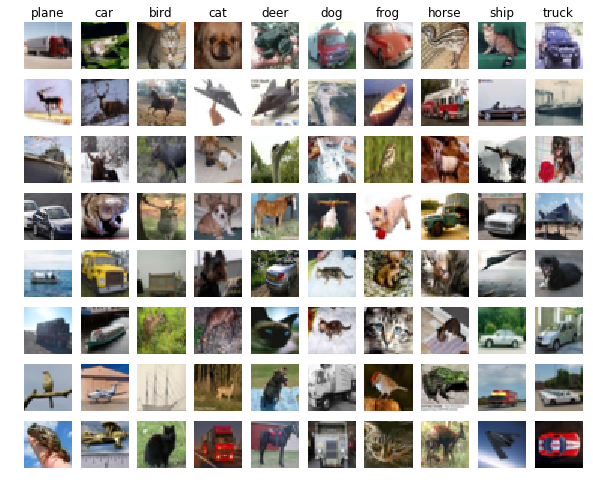

In [32]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

Pictures with blue sky are easily misclassificated as plane.
Texture is also a key factor. The misclassification results help to understand the how the algorithm works.

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [ ]:
print X_train_feats.shape

In [ ]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
# hidden_dim = 500
num_classes = 10

# net = TwoLayerNet(input_dim, hidden_dim, num_classes)
# best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
learning_rates=[1,10,50]
regularization_strengths = [3e-2,5e-2]
hidden_sizes=[50,500]
results={}
best_val=-1
best_net=None

for rate in learning_rates:
    for hidden_size in hidden_sizes:
        for reg in regularization_strengths:
            net=TwoLayerNet(input_dim, hidden_size, num_classes)
            stats=net.train(X_train_feats, y_train,X_val_feats,y_val,num_iters=8000, batch_size=200,\
            learning_rate=rate,learning_rate_decay=0.95, reg=reg, verbose=True)
            val_acc=(net.predict(X_val_feats)==y_val).mean()
            results[(rate,hidden_size,reg)]=val_acc
            if val_acc>best_val:
                best_net=net
                best_val=val_acc

for rate,hidden_size,reg in sorted(results):
    val_acc=results[(rate,hidden_size,reg)]
    print 'rate %e hidden_size %d reg %e val accuracy: %f' % (
                rate, hidden_size, reg, val_acc)

print 'best validation accuracy achieved during cross-validation: %f' % best_val
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

1 50 0.03
iteration 0 / 8000: loss 2.302586
iteration 100 / 8000: loss 1.764778
iteration 200 / 8000: loss 1.770112
iteration 300 / 8000: loss 1.819114
iteration 400 / 8000: loss 1.737850
iteration 500 / 8000: loss 1.771548
iteration 600 / 8000: loss 1.824239
iteration 700 / 8000: loss 1.841563
iteration 800 / 8000: loss 1.760849
iteration 900 / 8000: loss 1.760650
iteration 1000 / 8000: loss 1.652586
iteration 1100 / 8000: loss 1.635511
iteration 1200 / 8000: loss 1.832807
iteration 1300 / 8000: loss 1.762005
iteration 1400 / 8000: loss 1.799269
iteration 1500 / 8000: loss 1.627224
iteration 1600 / 8000: loss 1.795951
iteration 1700 / 8000: loss 1.634861
iteration 1800 / 8000: loss 1.758932
iteration 1900 / 8000: loss 1.755397
iteration 2000 / 8000: loss 1.710010
iteration 2100 / 8000: loss 1.819004
iteration 2200 / 8000: loss 1.737196
iteration 2300 / 8000: loss 1.628183
iteration 2400 / 8000: loss 1.592136
iteration 2500 / 8000: loss 1.852101
iteration 2600 / 8000: loss 1.782448
ite

cs231n/classifiers/neural_net.py:103: RuntimeWarning: divide by zero encountered in log
  loss=np.sum(-np.log(prob[index,y]))/N+0.5*reg*(np.sum(W1**2)+np.sum(W2**2))


iteration 100 / 8000: loss inf
iteration 200 / 8000: loss inf


cs231n/classifiers/neural_net.py:98: RuntimeWarning: overflow encountered in subtract
  scores-=np.max(scores,axis=1,keepdims=True)
cs231n/classifiers/neural_net.py:98: RuntimeWarning: invalid value encountered in subtract
  scores-=np.max(scores,axis=1,keepdims=True)
cs231n/classifiers/neural_net.py:103: RuntimeWarning: overflow encountered in square
  loss=np.sum(-np.log(prob[index,y]))/N+0.5*reg*(np.sum(W1**2)+np.sum(W2**2))
cs231n/classifiers/neural_net.py:79: RuntimeWarning: invalid value encountered in less
  l1[l1<0]=0
cs231n/classifiers/neural_net.py:123: RuntimeWarning: invalid value encountered in less_equal
  dscores2[l1 <= 0]=0    ######################## why????


iteration 300 / 8000: loss nan
iteration 400 / 8000: loss nan


cs231n/classifiers/neural_net.py:250: RuntimeWarning: invalid value encountered in less
  l1[l1<0]=0  #ReLu


iteration 500 / 8000: loss nan
iteration 600 / 8000: loss nan
iteration 700 / 8000: loss nan
iteration 800 / 8000: loss nan
iteration 900 / 8000: loss nan
iteration 1000 / 8000: loss nan
iteration 1100 / 8000: loss nan
iteration 1200 / 8000: loss nan
iteration 1300 / 8000: loss nan
iteration 1400 / 8000: loss nan
iteration 1500 / 8000: loss nan
iteration 1600 / 8000: loss nan
iteration 1700 / 8000: loss nan
iteration 1800 / 8000: loss nan
iteration 1900 / 8000: loss nan
iteration 2000 / 8000: loss nan
iteration 2100 / 8000: loss nan
iteration 2200 / 8000: loss nan
iteration 2300 / 8000: loss nan
iteration 2400 / 8000: loss nan
iteration 2500 / 8000: loss nan
iteration 2600 / 8000: loss nan
iteration 2700 / 8000: loss nan
iteration 2800 / 8000: loss nan
iteration 2900 / 8000: loss nan
iteration 3000 / 8000: loss nan
iteration 3100 / 8000: loss nan
iteration 3200 / 8000: loss nan
iteration 3300 / 8000: loss nan
iteration 3400 / 8000: loss nan
iteration 3500 / 8000: loss nan
iteration 360

In [ ]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print test_acc

# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!